# ENGR-E 221 Intelligent Systems I Fall 2023

## Homework 12 CNN algorithms 50 points

**Due Wednesday 11/29/2023 23:59 EST**


### Motivation from lab
We have provided you with some of the lab code below using the CIFAR10 dataset. For this homework you are going to build a CNN just like we did in lab, however the model.summary() cannot be the same (e.g., you have to build a different network structure). You should have all the tools you need. 

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

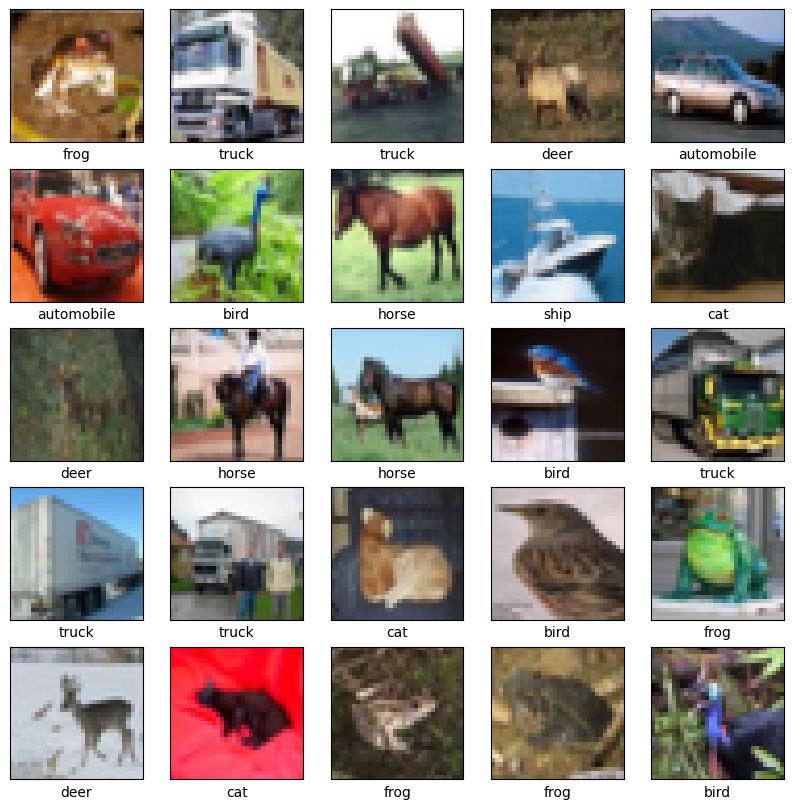

In [2]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [3]:
# This is the model from lab that you are going to compare your model to. 

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

## Problem 1: Build a CNN different than the one built in lab (30 pts)
Build a different CNN than we did in lab and compare the results. We want you to build your own CNN and compare it to the CNN we built in lab (the lab CNN is provided in the cell above). 

What happens when you change the filter size? What happens when you change the number of filters? What about the Dense layer?

Please visit this link to view all the hyperparameters you could change:
https://keras.io/api/layers/convolution_layers/convolution2d/

In class, we mention padding = 'same' (if you want to make sure your image size stays the same (honestly, I don't believe it will change your accuracy much) - it is just helpful when you need to control your image size for further processing/applications.

We also mentioned 'stride = 2' - as discussed in the link, it allows you to  "step over" rows/columns as you are applying your filters. This has the effect of reducing computation time and output size at the cost of spatial resolution.

And lastly, pay attention to your plot of accuracy and validation accuracy (especially if you change the number of epochs). What do you think it means if you your validation accuracy starts to decrease while your accuracy continues to rise?

Have fun!!


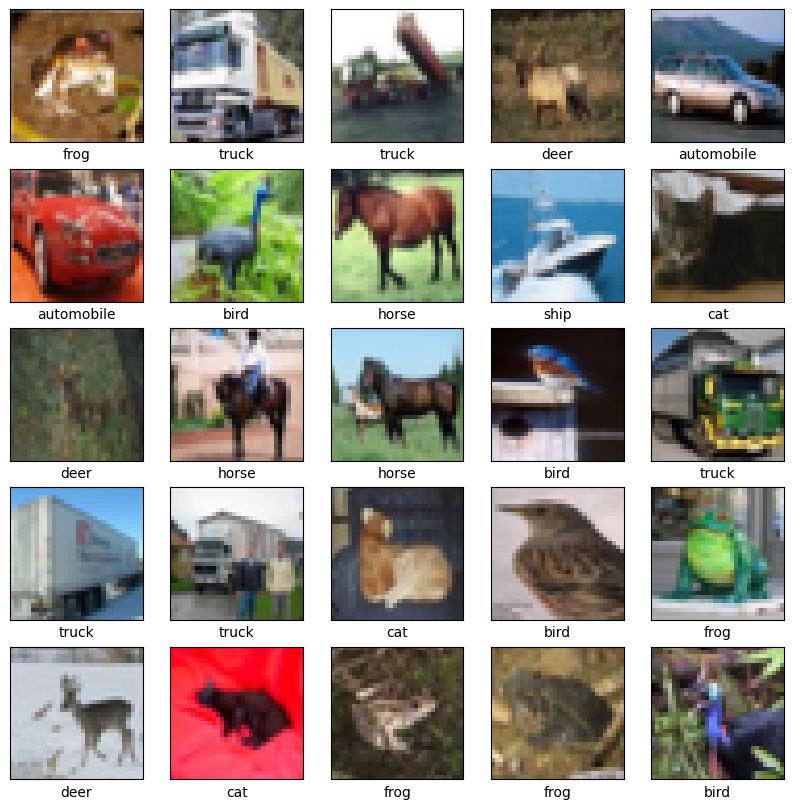

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

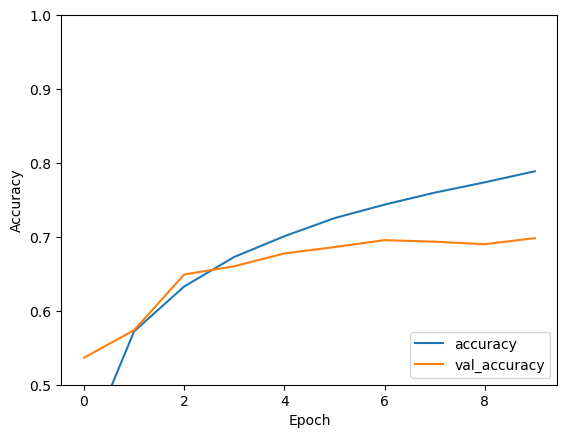

In [4]:
# Orignial lab data
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

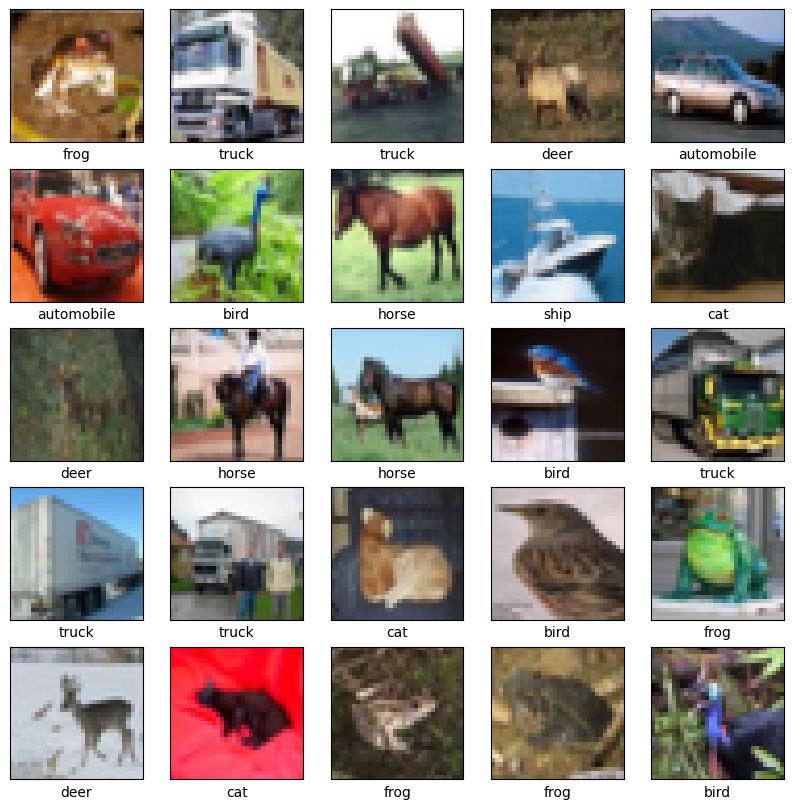

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 32)        18432     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 96)          27744     
                                                                 
 flatten_3 (Flatten)         (None, 1536)             

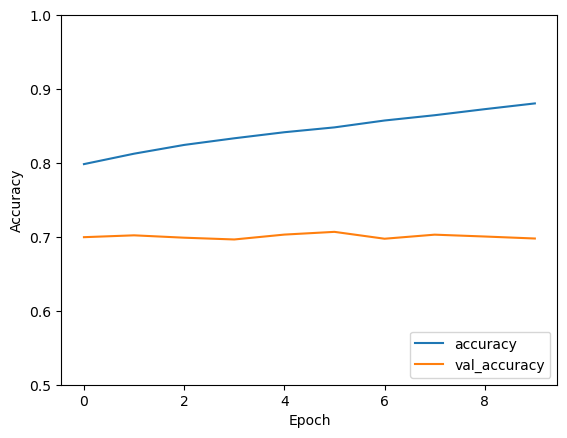

In [5]:
# My CNN
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

nmodel = models.Sequential()
nmodel.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
nmodel.add(layers.MaxPooling2D((2, 2)))
nmodel.add(layers.Conv2D(32, (3, 3),padding="valid",use_bias=False, kernel_initializer="glorot_uniform",bias_constraint=None, activation='relu'))
nmodel.add(layers.MaxPooling2D((2, 2)))
nmodel.add(layers.Conv2D(96, (3, 3), padding = "valid", use_bias=True, kernel_initializer="glorot_uniform", activation=None))
nmodel.add(layers.Flatten())
nmodel.add(layers.Dense(148, activation='relu'))
nmodel.add(layers.Dense(10))
nmodel.add(layers.Flatten())
nmodel.add(layers.Dense(64, activation='relu'))
nmodel.add(layers.Dense(10))
nmodel.summary()
nmodel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

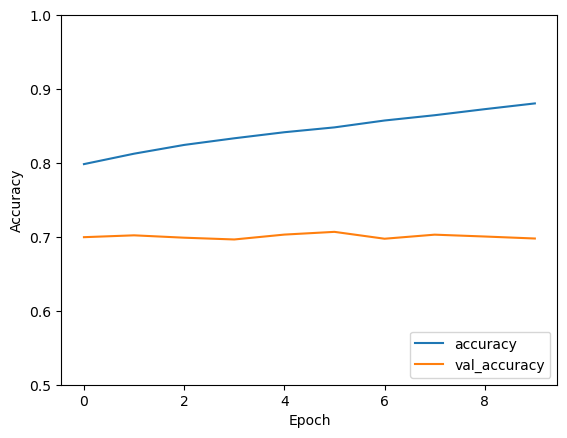

313/313 - 2s - loss: 1.2071 - accuracy: 0.6978 - 2s/epoch - 8ms/step


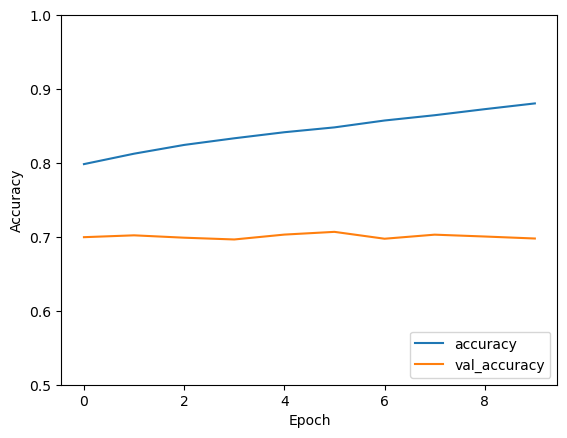

313/313 - 3s - loss: 2.3035 - accuracy: 0.1036 - 3s/epoch - 9ms/step


In [6]:
## Model results provide a figure like lab and an accuracy metric.
## You need 2 plots one you already created in lab and the results of your newly created CNN (10 pts 5 per plot)
## Accuracy metrics (5 pts)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()
test_loss, test_acc = nmodel.evaluate(test_images,  test_labels, verbose=2)

### Compare new CNN from the one in lab (5 pts)

Using the same data as the lab CNN version we have developed a new CNN model to furthur explore the parameters of model. Our new model(nmodel) has added layers that include pararmeters such as bias constraints, padding, use variance, and more (check code). Looking at the final results of the accuracy and loss function we can see that including more restictions to the layer and changing the parameters have caused a significant increase in loss and decrease of accuracy in our CNN model compared to the orignial(lab). Furthermore looking and our model summaries we can see the reason for the change in accuracy and loss, the increase in the parameters in each layer and their respective sizes. The large size output shape of each layer seems to be the main reason for the decrease of accuracy in our model compared to the original. However, it is important to note that we have increased the epoch of our model from 2(orginal) to 3 which can mean that our CNN model might be overfitting which increases the loss function and tainted our accuracy score.

## Problem 2: Sketch out your network (20 pts)

Please using the model.summary() output and any type of visual representation of a CNN found in the slides (block/layer diagrams) to make a skech of your network and describe with sentences the input layer, each hidden layer and the associated shapes and finally the output layer and the shape of the output layer. Your description should clearly describe:

1) Input layer features and shape
2) Hidden layers (how many and each manipulation along the way, and the final shape at each step)
3) The output layer (shape and what does it represent). 

You can sketch on paper and take a picture with your phone. You can upload the picture directy to the notebook using Edit/Insert Image


### Students NN description (10 pts)

The sketch starts with the layers of the model and how the model will extract the subset of layers from the initial set and will continue to do so until all layers are completed. This is then repeated for each point or | in the initial layer of data. Similiary this can be sketched as a bunch of nodes connected together, however it starts with the 2 output layers and each layers nodes is one point or | seen in the layers sketch. Similarly the Relu kerneal used for each layer is showcased that is used to determine the loss of each layer.

### Students NN sketch (10 pts)

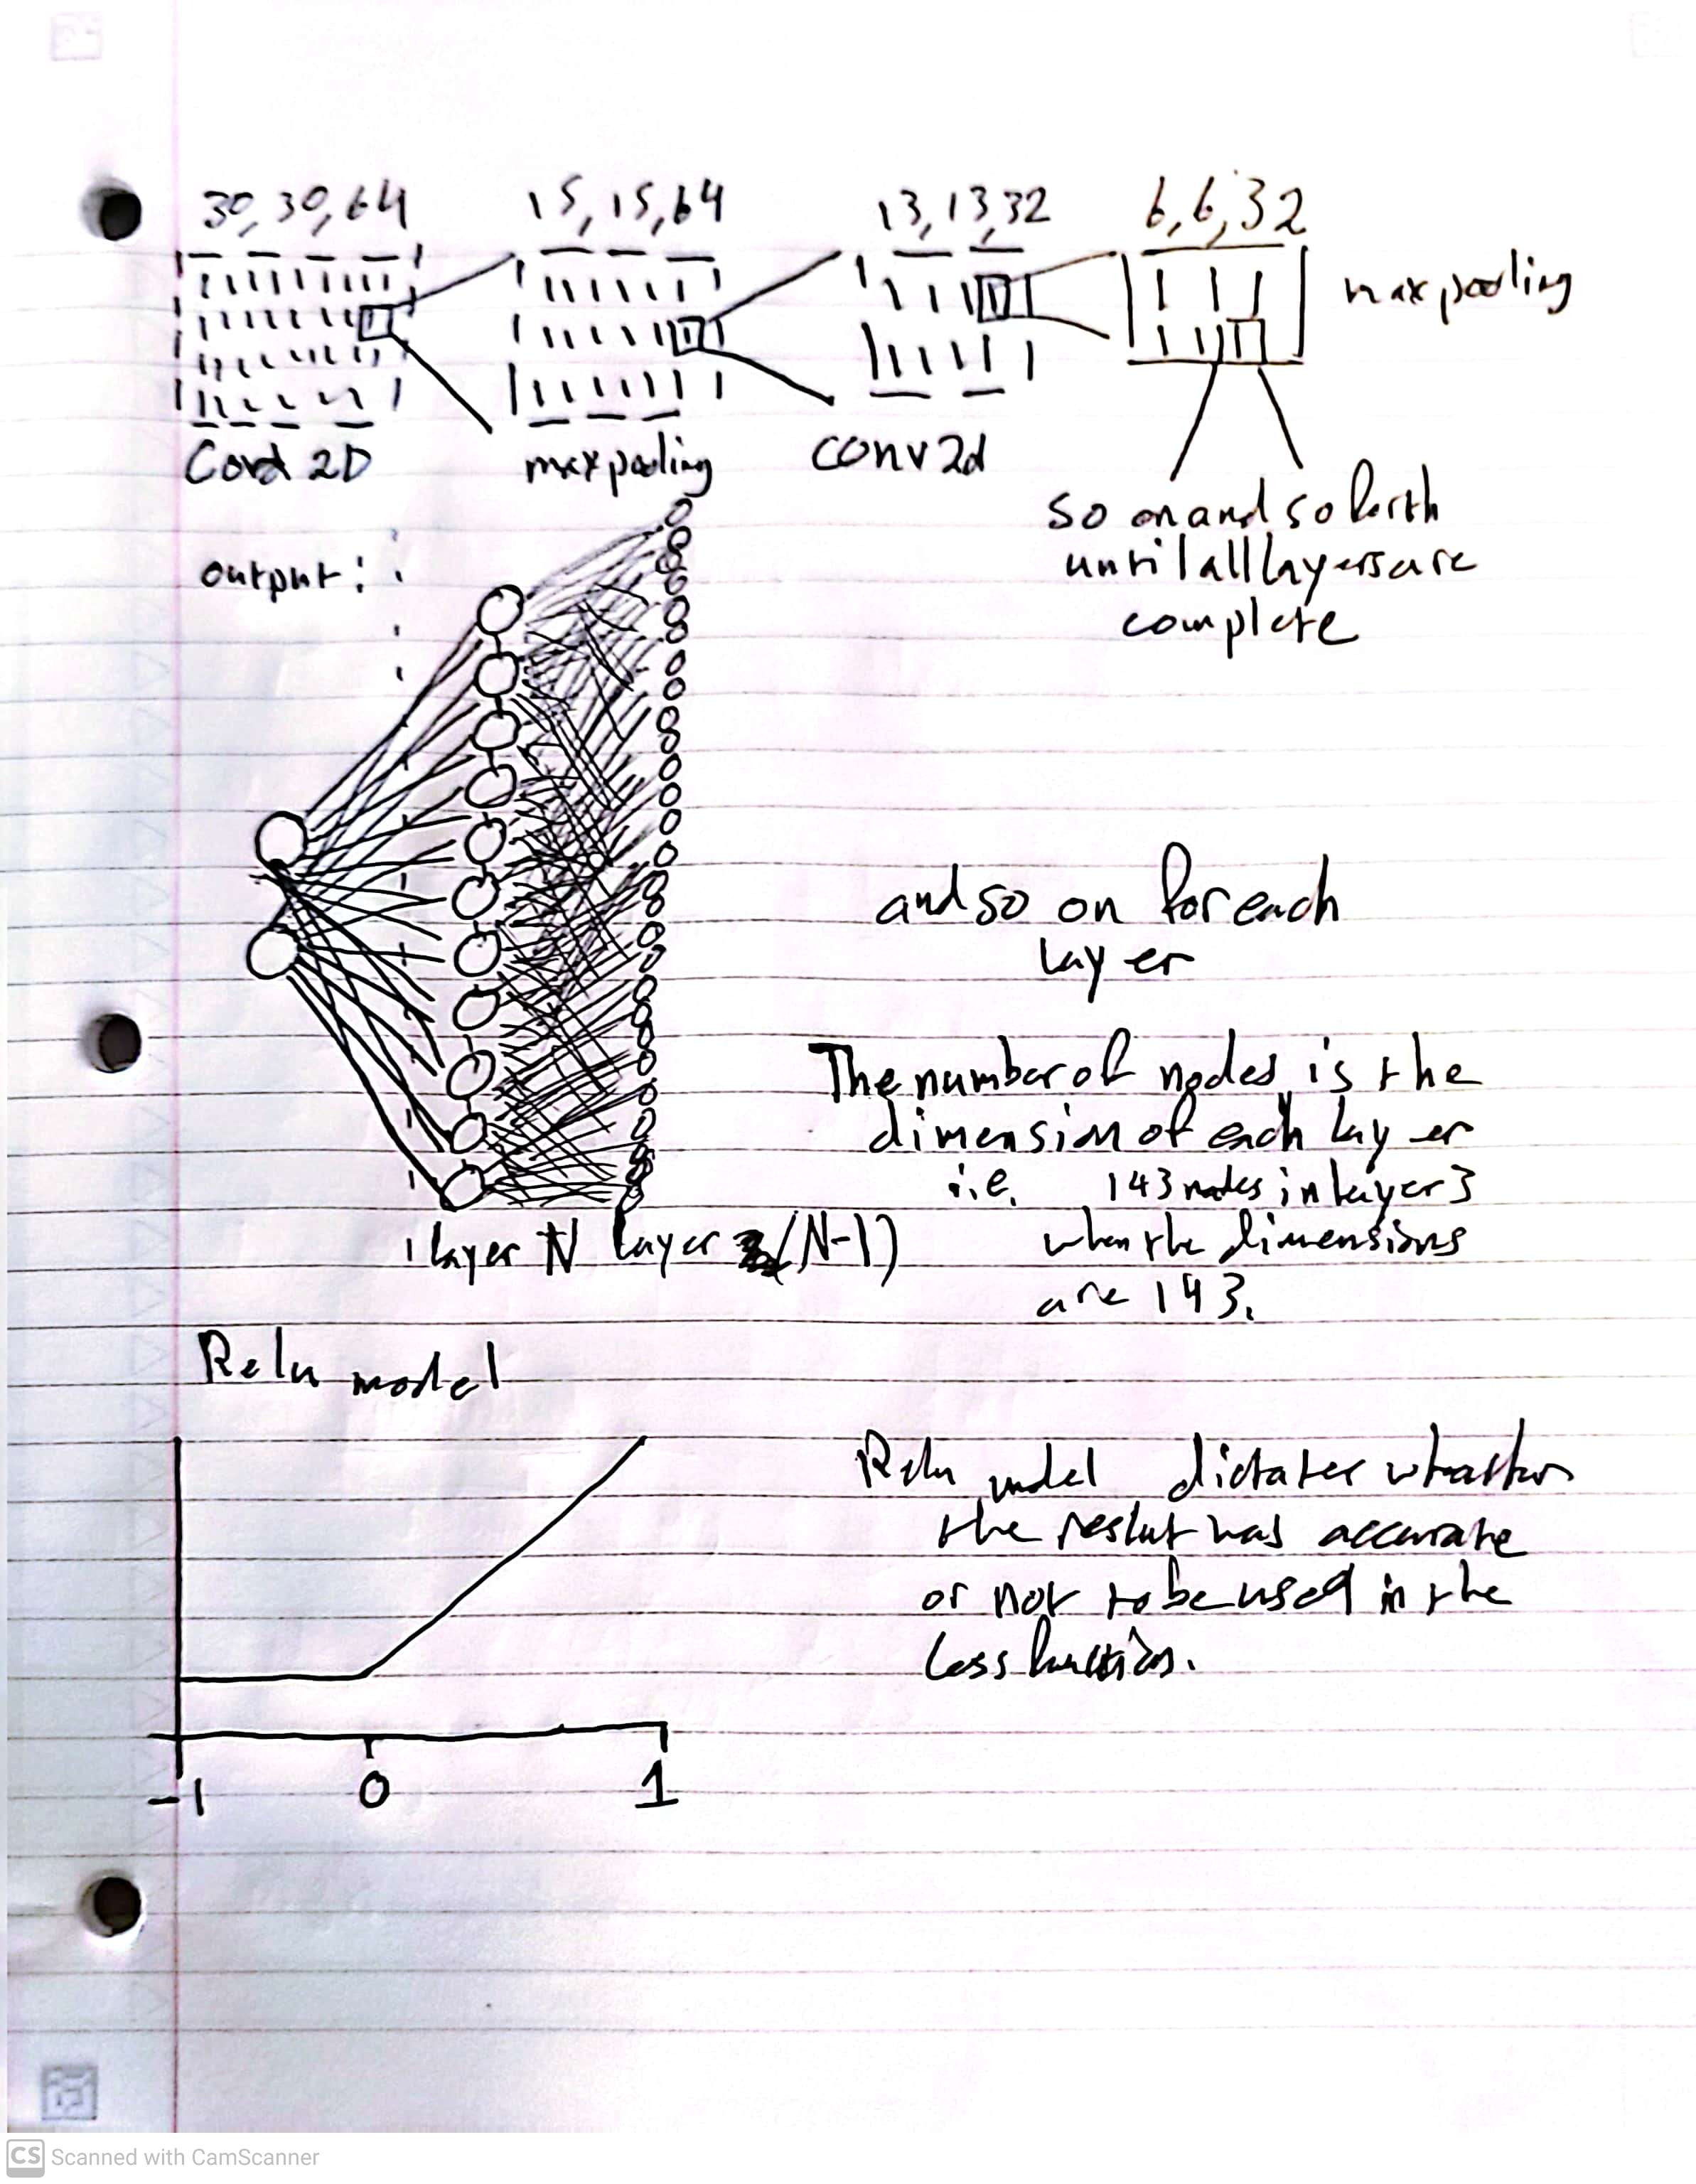